In [1]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
import sklearn.datasets
import sklearn.metrics
import sklearn.preprocessing

from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = sklearn.datasets.load_iris()
iris.data[:3], iris.target[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]), array([0, 0, 0]))

In [34]:
print(iris.feature_names)
petal_length_idx = 2
petal_width_idx = 3
X = iris.data[:,(petal_length_idx,petal_width_idx)]
X.shape[0], X[:3]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2]]))

In [36]:
sc = sklearn.preprocessing.StandardScaler()
model = KNeighborsClassifier(p=2, n_neighbors=5, metric='minkowski')

Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model = model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train) 
Y_pred = model.predict(X_test)

tr = sklearn.metrics.accuracy_score(Y_train, Y_train_pred)
te = sklearn.metrics.accuracy_score(Y_test, Y_pred)
tr, te

(0.9809523809523809, 0.9555555555555556)

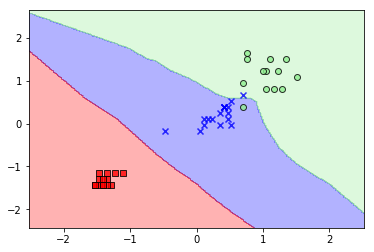

In [37]:
import numpy as np
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        

plot_decision_regions(X_test, Y_test, model)